<a href="https://colab.research.google.com/github/Ananya-AJ/CMPE255-Data-Mining/blob/main/Clustering/k_meansscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import cluster
from sklearn import preprocessing
import plotly.express as px
from sklearn.datasets import make_blobs


In [2]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d binovi/wholesale-customers-data-set

  0% 0.00/6.85k [00:00<?, ?B/s]
100% 6.85k/6.85k [00:00<00:00, 4.72MB/s]


In [3]:
!unzip wholesale-customers-data-set.zip

Archive:  wholesale-customers-data-set.zip
  inflating: Wholesale customers data.csv  


In [6]:
df = pd.read_csv("/content/Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [11]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

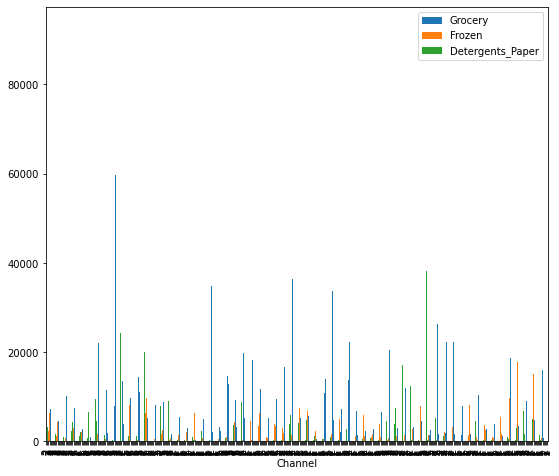

In [10]:
df.plot(x="Channel", y=["Grocery", "Frozen","Detergents_Paper"], kind="bar", figsize=(9, 8))
plt.show()

##k-means from scratch and few plotting defs

In [13]:
class KMeansClustering:
    def __init__(self, X, num_clusters):
        self.K = num_clusters # cluster number
        self.max_iterations = 100 # max iterations
        self.num_examples, self.num_features = X.shape
        self.plot_figure = True # plot figure


    def initialize_random_centroids(self, X):
        centroids = np.zeros((self.K, self.num_features)) 
        for k in range(self.K):
            centroid = X[np.random.choice(range(self.num_examples))] # random centroids
            centroids[k] = centroid
        return centroids 
    
    def create_cluster(self, X, centroids):
        clusters = [[] for _ in range(self.K)]
        for point_idx, point in enumerate(X):
            closest_centroid = np.argmin(
                np.sqrt(np.sum((point-centroids)**2, axis=1))
            ) # closest centroid using euler distance equation(calculate distance of every point from centroid)
            clusters[closest_centroid].append(point_idx)
        return clusters 

    def calculate_new_centroids(self, cluster, X):
        centroids = np.zeros((self.K, self.num_features))
        for idx, cluster in enumerate(cluster):
            new_centroid = np.mean(X[cluster], axis=0) # find the value for new centroids
            centroids[idx] = new_centroid
        return centroids

    def predict_cluster(self, clusters, X):
        y_pred = np.zeros(self.num_examples) 
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                y_pred[sample_idx] = cluster_idx
        return y_pred
    def plot_fig(self, X, y):
        fig = px.scatter(X[:, 0], X[:, 1], color=y)
        fig.show() 
        
    def fit(self, X):
        centroids = self.initialize_random_centroids(X) 
        for _ in range(self.max_iterations):
            clusters = self.create_cluster(X, centroids) # create cluster
            previous_centroids = centroids
            centroids = self.calculate_new_centroids(clusters, X) 
            diff = centroids - previous_centroids 
            if not diff.any():
                break
        y_pred = self.predict_cluster(clusters, X) 
        if self.plot_figure: 
            self.plot_fig(X, y_pred) 
        return y_pred



In [15]:
if __name__ == "__main__":
    np.random.seed(10)
    num_clusters = 3 # num of cluster
    X, _ = make_blobs(n_samples=1000, n_features=2, centers=num_clusters) 
    Kmeans = KMeansClustering(X, num_clusters)
    y_pred = Kmeans.fit(X)

In [12]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


##Standardize the data

In [16]:
scaler = preprocessing.StandardScaler()
data_scaled = scaler.fit_transform(df)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


##Fit Data

In [17]:
kmeans = cluster.KMeans(n_clusters=2, init='k-means++') # ‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
kmeans.fit(data_scaled)

KMeans(n_clusters=2)

In [20]:
kmeans = cluster.KMeans(n_clusters=5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
pred

array([2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3,
       3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2,
       2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 3, 3, 1, 2, 3, 3, 2, 1, 2, 2, 3, 1,
       3, 2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 3, 2, 1, 1, 3,
       3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 2, 0, 2,

##elbow method

Text(0, 0.5, 'Inertia')

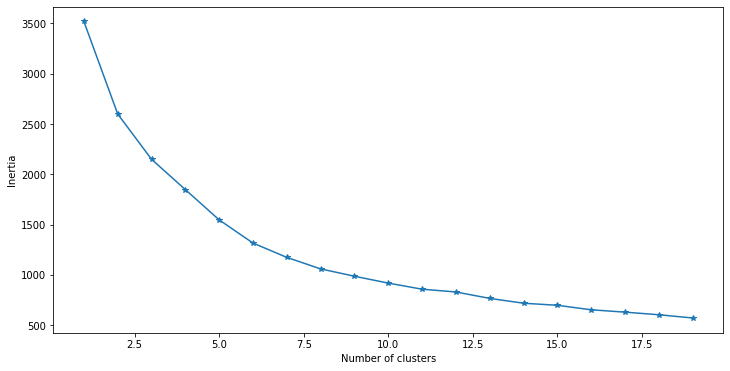

In [18]:
SSE = []
for i in range(1,20):
    kmeans = cluster.KMeans(n_clusters = i, init='k-means++') # iterate from range (1, 20)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker="*")
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##counts in each cluster

In [21]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    210
2    126
0     91
1     10
4      3
Name: cluster, dtype: int64

##3d scatter plot for each cluster

In [24]:
dataset = df.copy()
dataset["cluster"] = pred

In [26]:
fig = px.scatter_3d(dataset, x="Grocery", y="Milk", z="Fresh", color='cluster', size="Fresh", size_max=30)
fig.show()